# Feature Scaling

- Feature Scaling
 1. MinMaxScaler
 2. MaxAbsScaler
 3. StandardScaler
 4. RobustScaler
 5. PowerTransformer
 6. QuantileTransformer
 7. Normalizer
 - まとめ
- 補足：Skewness Transformation
  1. Log
  2. Square root

By Kritdikoon Woraitthinan 2021-01-15

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

## Feature Scaling
- 特徴量のスケーリング（Feature Scaling）とはモデルの学習する前処理の一つの手法で、特徴量間のスケールを変換することです。データセットの特徴量間でスケールが異なることは多々あります。特徴量間で異なるスケールのデータセットをモデルで学習させた場合、うまく学習できないということがおこるのです。そのため、学習前の前処理で、特徴量間のスケールを揃えるなど必要があります。

###  Library Import

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('seaborn')

import math
import statistics
import numpy as np
import scipy.stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

from sklearn.datasets import fetch_california_housing

### Data Load
- カリフォルニア住宅価格のデータセット

In [2]:
# Load data

data = fetch_california_housing()
df = pd.DataFrame(np.c_[data.data, data.target], columns=data.feature_names + ["target"])
X = df['Population'].values.reshape(-1, 1)
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


### Base Distribution

mean     = 1425.48
median   = 1166.0
min      = 3.0
max      = 35682.0
SD       = 1132.43
skew     = 4.94
kurtosis = 73.55



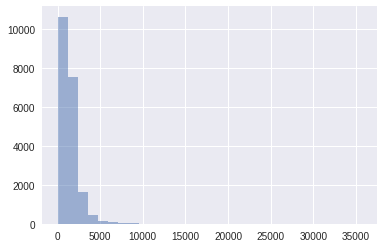

In [3]:
print('mean     = ' + str(round(np.mean(X),2)) + '\n'+
      'median   = ' + str(round(np.median(X),2)) + '\n'+
      'min      = ' + str(round(np.min(X),2)) + '\n'+
      'max      = ' + str(round(np.max(X),2)) + '\n'
      'SD       = ' + str(round(np.std(X),2)) + '\n'
      'skew     = ' + str(round(scipy.stats.skew(X)[0],2)) + '\n'
      'kurtosis = ' + str(round(scipy.stats.kurtosis(X, bias=False)[0],2)) + '\n'
      )
plt.hist(X, bins=30, alpha=0.5);

### 統計量
- mean = 平均値
- median = 中央値
- min = 最小値
- max = 最大値
- SD = 標準偏差とは、分散を平方根にとることによって計算される値です。
- skew = 歪度とは、分布の非対称性を示す指標。値が正であると分布が右に伸びている。逆に負であると左に伸びている。
- kurtosis = 尖度とは、正規分布を基準とした分布の鋭さの指標。基準である正規分布の尖度よりも大きければ分布は尖っており、小さければ緩やかな分布である。


In [4]:
def get_plot(data, title):
  subplot_n = len(data)
  fig, axs = plt.subplots(1, subplot_n,  figsize=(subplot_n*5,4))
  for i, x in enumerate(data):
    axs[i].hist(x, bins=30, alpha=0.5)
    axs[i].set_title( title[i] + '\n'+
                  'mean  = '   + str(round(np.mean(x),2)) + '\n'+
                  'median  = ' + str(round(np.median(x),2)) + '\n'+
                  'min  = '    + str(round(np.min(x),2)) + '\n'+
                  'max  = '    + str(round(np.max(x),2)) + '\n'
                  'SD  = '     + str(round(np.std(x),2)) + '\n'
                  'skew  = '   + str(round(scipy.stats.skew(x, bias=False)[0],2)) + '\n'
                  'kurtosis  = '   + str(round(scipy.stats.kurtosis(x, bias=False)[0],2)) + '\n'
                  );

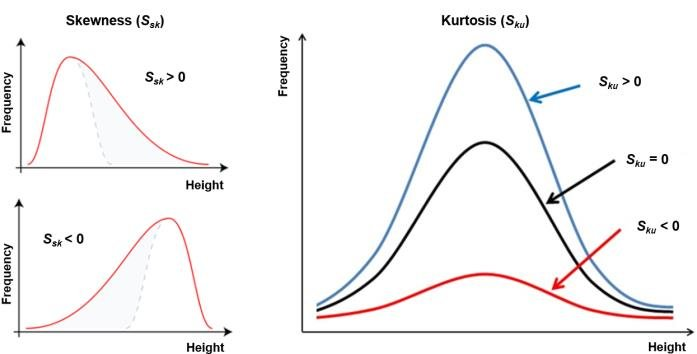

## Feature Scaling

### MinMaxScaler

- 正規化(normalization)とは、特徴量の値の範囲を一定の範囲におさめる変換になります。主に[0, 1]か、[-1, 1]の範囲内におさめることが多いです。
- 特徴：
 - 分かりやすい手法。
 - 新しいデータでは異なるスケールの問題が可能性があります。
 - 外れ値は影響が高いです。

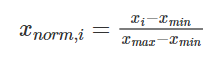


- xnormが正規化されたxになります。
- xminはxxの最小値、 xmaxはxの最大値です。

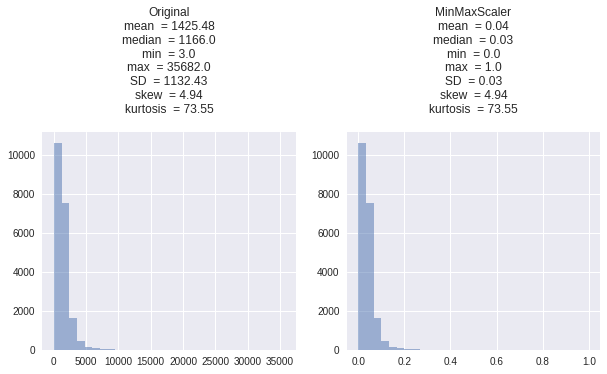

In [5]:
X_MinMaxScaler = MinMaxScaler().fit_transform(X)

get_plot([X, X_MinMaxScaler], ['Original', 'MinMaxScaler'])

### MaxAbsScaler

- MaxAbsScalerは、MinMaxScalerに似て、値が[0、1]の範囲におさめる変換になります。 絶対値のデータでは、両方のスケーラーは同じように動作します。

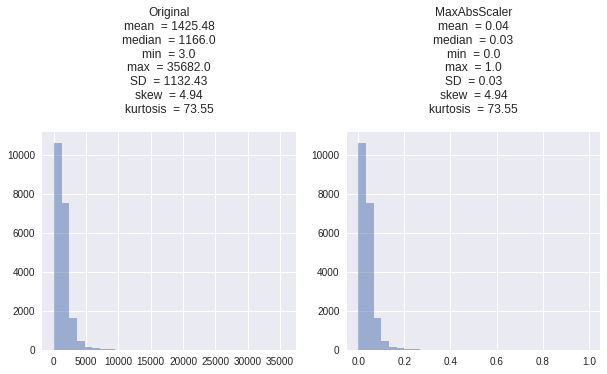

In [6]:
X_MaxAbsScaler = MaxAbsScaler().fit_transform(X)

get_plot([X, X_MaxAbsScaler], ['Original', 'MaxAbsScaler'])

### StandardScaler

標準化(standardization)

- StandardScaler特徴量の平均を0、分散を1にする変換になります。 外れ値は、平均と標準偏差を計算するときに影響を及ぼします。
- 特徴:
 - データが正規分布していない（例えば、、ガウス分布）場合は良くありません。
 - 標準化は正規化よりも外れ値の影響が少ないとのこと。

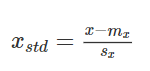

- xstdが標準化されたxになります。
- mxがxの標本平均、 sxがxの標本標準偏差になります。

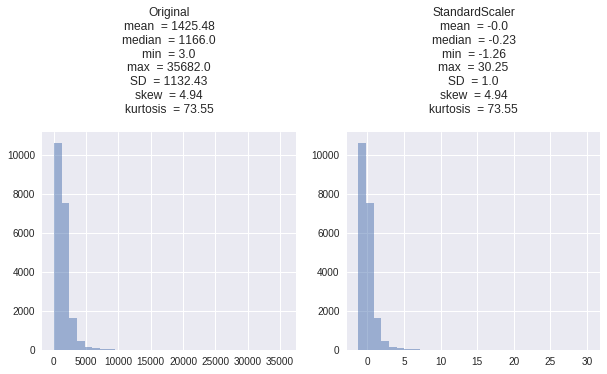

In [7]:
X_StandardScaler = StandardScaler().fit_transform(X)

get_plot([X, X_StandardScaler], ['Original', 'StandardScaler'])

### RobustScaler
- 中央値と四分位数で変換。外れ値を無視できる変換方法。中央値は0に変換になります。
- 中央値を削除し、データを第1四分位から第3四分位の間の範囲でスケーリングします。
- 特徴：
 - 中央値と四分位範囲保存し、新しいデータで使用できます。
 - MinMaxScalerと比較して、RobustScalerは外れ値の影響を減らします。

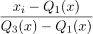

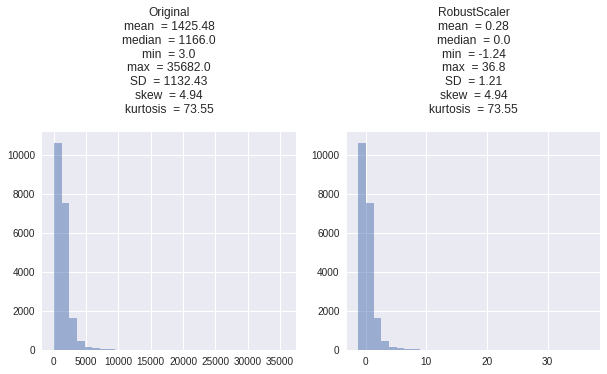

In [8]:
X_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X)

get_plot([X, X_RobustScaler], ['Original', 'RobustScaler'])

### PowerTransformer
- PowerTransformerは、分散を安定化し、歪度を最小化するための最適なパラメータは、最尤によって推定されます。
- 平均は0、標準偏差は1になります。
- Box-Coxは入力データが厳密に正であることを要求しますが、Yeo-Johnsonは正または負の両方のデータをサポートしています。

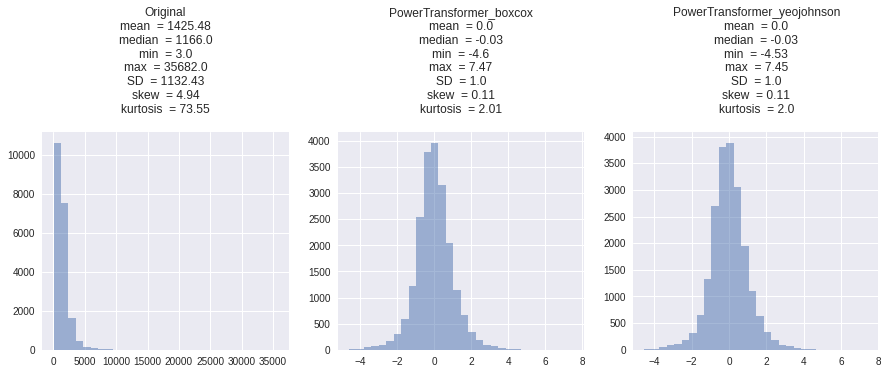

In [9]:
X_PowerTransformer_boxcox = PowerTransformer(method='box-cox').fit_transform(X)
X_PowerTransformer_yeojohnson = PowerTransformer(method='yeo-johnson').fit_transform(X)

get_plot([X, X_PowerTransformer_boxcox, X_PowerTransformer_yeojohnson], 
         ['Original', 'PowerTransformer_boxcox', 'PowerTransformer_yeojohnson'])

### QuantileTransformer
- QuantileTransformerは非線形変換を適用します。 

- Uniform
 - 各特徴の確率密度関数は、均一分布またはガウス分布推定されます。
 - 値が[0、1]の範囲におさめる変換になります。
 - 外れ値の影響がなくなります。
 - 歪度は0になります。

- Normal
 - 正規分布曲線になります。

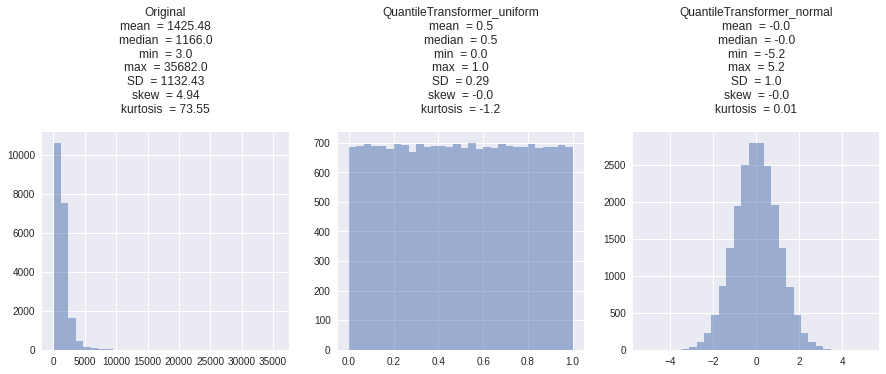

In [10]:
X_QuantileTransformer_uniform = QuantileTransformer(output_distribution='uniform').fit_transform(X)
X_QuantileTransformer_normal = QuantileTransformer(output_distribution='normal').fit_transform(X)

get_plot([X, X_QuantileTransformer_uniform, X_QuantileTransformer_normal], 
         ['Original', 'QuantileTransformer_uniform', 'QuantileTransformer_normal'])

### Normalizer
- 列ではなく行で処理します。
- デフォルトでは、L2正規化が各観測値に適用されるため、行の値は単位ノルムになります。
- 値が[-1、1]の範囲におさめる変換になります。


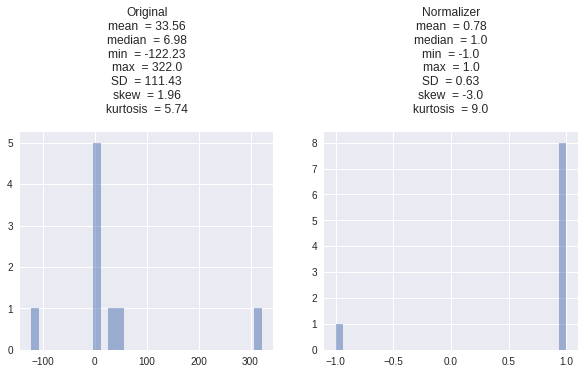

In [11]:
row1 = df.iloc[0:2].values[0].reshape(-1, 1)

X_Normalizer = Normalizer().fit_transform(row1)

get_plot([row1, X_Normalizer], ['Original', 'Normalizer'])

## Skew Transformation

### Log Transformation (対数変換)
- log(y)
- 対数変換、偏ったデータに対処するために広く使用されている方法
- 対数は、分布の形状に大きな影響を与える強力な変換です。

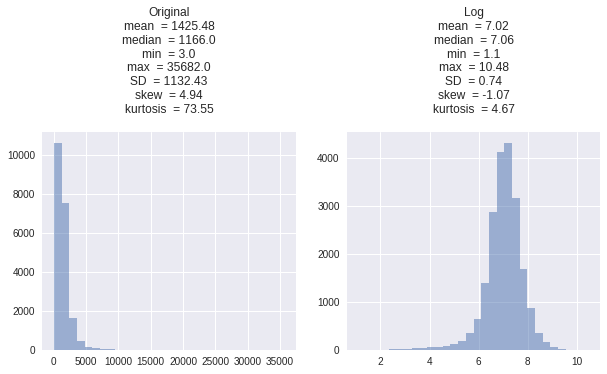

In [12]:
X_log = np.log(X)

get_plot([X, X_log], ['Original', 'Log'])

### Square Root Transformation (平方根変換)
- √y
- 平方根法は通常、データが適度に歪んでいる場合に使用されます。
- 正の値にのみ適用されます。

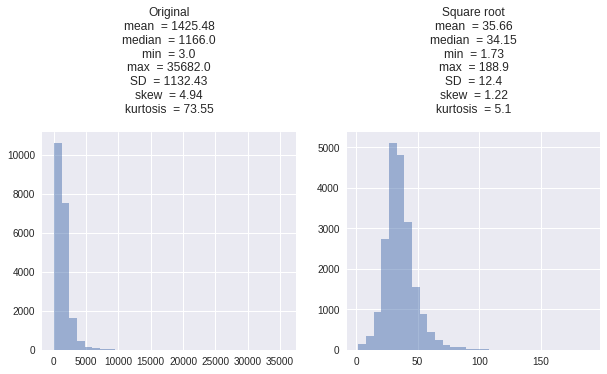

In [13]:
X_sqrt = np.sqrt(X)

get_plot([X, X_sqrt], ['Original', 'Square root'])

## まとめ

- デフォルトとしてMinMaxScaler。 データ分布は変更されません。
- 比較的正規分布が必要な場合は、StandardScalerを使用してください。
- 外れ値の影響をを減らしたい場合は、RobustScaler、PowerTransformer、QuantileTransformerを利用します。
- 偏ったデータに対処すする場合は、Log TransformationとSquare Root Transformationを利用します。